# Vector Autoregressions tsa.vector_ar

* Ref: [https://www.statsmodels.org/dev/vector_ar.html](https://www.statsmodels.org/dev/vector_ar.html)
* Data: 用 statsmodels 自帶的 dataset

照著說明做了一遍，可是還是完全不懂...

函數不知道該怎麼用，圖形不會解釋，結果也不懂

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from IPython.display import display

In [29]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base.datetools import dates_from_str

## 1. Load data

In [24]:
df = sm.datasets.macrodata.load_pandas().data
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      203 non-null    float64
 1   quarter   203 non-null    float64
 2   realgdp   203 non-null    float64
 3   realcons  203 non-null    float64
 4   realinv   203 non-null    float64
 5   realgovt  203 non-null    float64
 6   realdpi   203 non-null    float64
 7   cpi       203 non-null    float64
 8   m1        203 non-null    float64
 9   tbilrate  203 non-null    float64
 10  unemp     203 non-null    float64
 11  pop       203 non-null    float64
 12  infl      203 non-null    float64
 13  realint   203 non-null    float64
dtypes: float64(14)
memory usage: 22.3 KB


## 1.1 Data preprocessing

In [26]:
df = df[['year', 'quarter', 'realgdp','realcons','realinv']]
df['year'] = df['year'].astype(int).astype(str)
df['quarter'] = df['quarter'].astype(int).astype(str)
df['quarterly'] = df['year'] + 'Q' + df['quarter']
df['quarterly'] = dates_from_str(df['quarterly']) # 這裡是選用每一季的最後一天
df.set_index('quarterly', inplace=True)
df.drop(['year', 'quarter'], axis=1, inplace=True)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,realgdp,realcons,realinv
quarterly,,,
1959-03-31,2710.349,1707.4,286.898
1959-06-30,2778.801,1733.7,310.859
1959-09-30,2775.488,1751.8,289.226
1959-12-31,2785.204,1753.7,299.356
1960-03-31,2847.699,1770.5,331.722


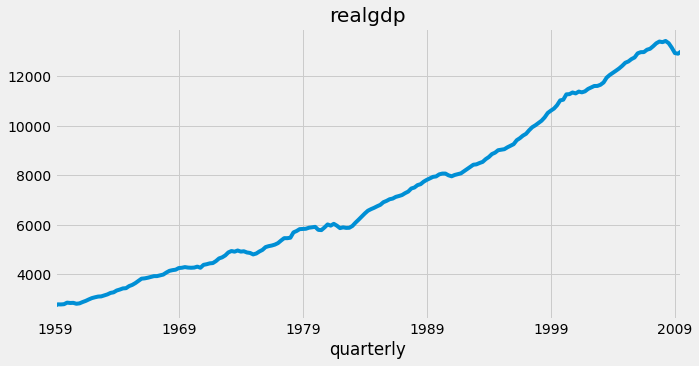

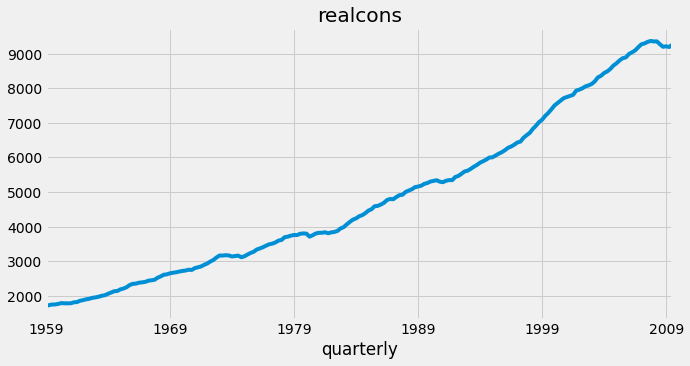

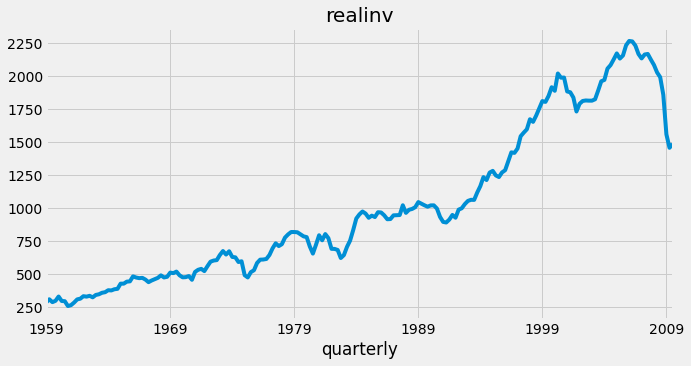

In [37]:
for col in df.columns:
  fig, ax = plt.subplots(figsize=(10, 5))
  df[col].plot(ax=ax)
  ax.set_title(col)
  plt.show()

## 2. Analysis
* 檢查是否是 stationary

In [35]:
def adf_test(time_series):
    # perform Dickey-Fuller test
    # null hypothesis: the time series is non-stationary 
    from statsmodels.tsa.stattools import adfuller # Use augmented dickey-fuller test to check stationality

    print('Results of Dickey-Fuller test:')
    adf_test = adfuller(time_series, autolag='AIC') # AIC: Akaike information criterion (AIC), the smaller AIC the better model

    index = [
      'Test statistics (ADF)',
      'p-value',
      'Number of lags used',
      'Number of observations used'
    ]
    adf_results = pd.Series(adf_test[:4], index=index)

    for k, v in adf_test[4].items():
        adf_results[f'Critical value ({k})'] = v

    print(adf_results)

    if adf_results[1] <= 0.05:
        print('Because p <= 0.05, we reject the null hypothesis')
        print('--> The time series is stationary')
    else:
        print('The time series is non-stationary')

In [39]:
for col in df.columns:
  adf_test(df[col].values)
  print('\n')

Results of Dickey-Fuller test:
Test statistics (ADF)            1.750463
p-value                          0.998246
Number of lags used             12.000000
Number of observations used    190.000000
Critical value (1%)             -3.465244
Critical value (5%)             -2.876875
Critical value (10%)            -2.574945
dtype: float64
The time series is non-stationary


Results of Dickey-Fuller test:
Test statistics (ADF)            1.549912
p-value                          0.997699
Number of lags used              4.000000
Number of observations used    198.000000
Critical value (1%)             -3.463815
Critical value (5%)             -2.876251
Critical value (10%)            -2.574611
dtype: float64
The time series is non-stationary


Results of Dickey-Fuller test:
Test statistics (ADF)           -1.257252
p-value                          0.648496
Number of lags used              3.000000
Number of observations used    199.000000
Critical value (1%)             -3.463645
Critica

* 因為三個 time series 都不是 stationary 的，所以要做 differencing
* 這邊還加上了取 log

In [40]:
df = np.log(df).diff().dropna()
df.head()

,realgdp,realcons,realinv
quarterly,,,
1959-06-30,0.024942,0.015286,0.080213
1959-09-30,-0.001193,0.010386,-0.072131
1959-12-31,0.003495,0.001084,0.034425
1960-03-31,0.022190,0.009534,0.102664
1960-06-30,-0.004685,0.012572,-0.106694


* 再檢查一次是否是 stationary

In [41]:
for col in df.columns:
  adf_test(df[col].values)
  print('\n')

Results of Dickey-Fuller test:
Test statistics (ADF)         -6.972871e+00
p-value                        8.575096e-10
Number of lags used            1.000000e+00
Number of observations used    2.000000e+02
Critical value (1%)           -3.463476e+00
Critical value (5%)           -2.876102e+00
Critical value (10%)          -2.574532e+00
dtype: float64
Because p <= 0.05, we reject the null hypothesis
--> The time series is stationary


Results of Dickey-Fuller test:
Test statistics (ADF)           -4.991971
p-value                          0.000023
Number of lags used              2.000000
Number of observations used    199.000000
Critical value (1%)             -3.463645
Critical value (5%)             -2.876176
Critical value (10%)            -2.574572
dtype: float64
Because p <= 0.05, we reject the null hypothesis
--> The time series is stationary


Results of Dickey-Fuller test:
Test statistics (ADF)         -1.221896e+01
p-value                        1.118658e-22
Number of lags us

* 現在三個 time series 都是 stationary 的了，所以可以使用 VAR(p)

## 3. Forecast
* VAR 要求 time series 必須是 stationary 的
  * 如果是 Non-stationary time series 的話 VAR(p) 模型並不適用
  * Non-stationary time series 就必須要先經過一階 differencing 或是其他方式，使得 time series 變成 stationary 的
* [https://www.statsmodels.org/dev/generated/statsmodels.tsa.vector_ar.var_model.VAR.html#statsmodels.tsa.vector_ar.var_model.VAR](https://www.statsmodels.org/dev/generated/statsmodels.tsa.vector_ar.var_model.VAR.html#statsmodels.tsa.vector_ar.var_model.VAR)

In [46]:
model = VAR(df)

p = 2 # lags, 可以指定要用多少個 lags 來做模型
model_fitted = model.fit(2)
model_fitted.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 09, Sep, 2020
Time:                     04:19:00
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.5830
Nobs:                     200.000    HQIC:                  -27.7892
Log likelihood:           1962.57    FPE:                7.42129e-13
AIC:                     -27.9293    Det(Omega_mle):     6.69358e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001527         0.001119            1.365           0.172
L1.realgdp         -0.279435         0.169663           -1.647           0.100
L1.realcons         0.675016         0.131285            5.142    

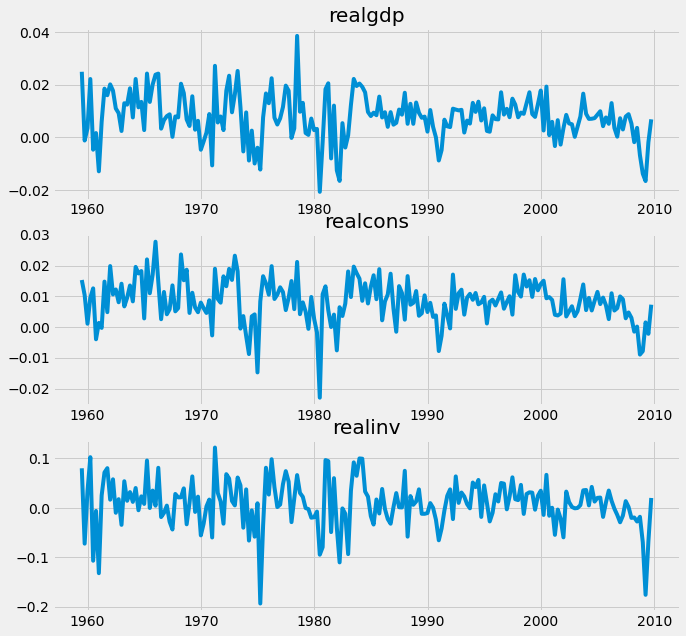

In [43]:
# visualization
fig = model_fitted.plot()

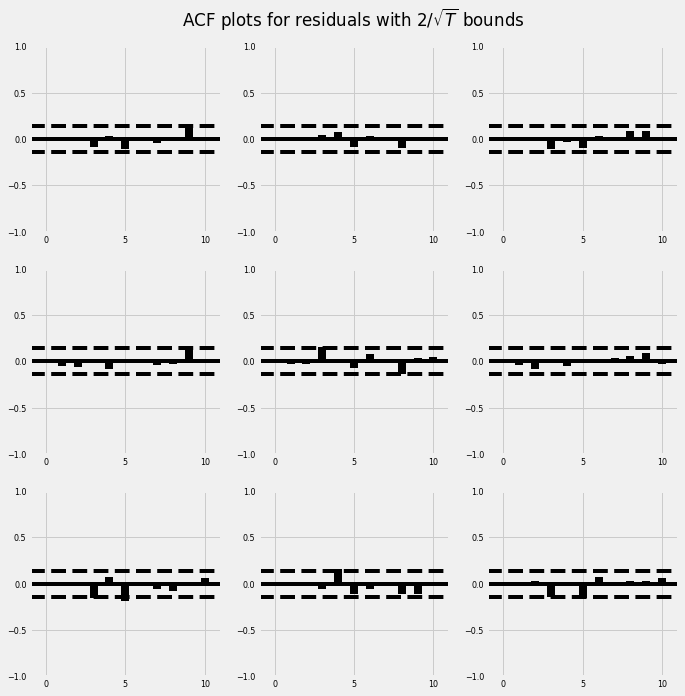

In [45]:
# 畫 auto correlation
fig = model_fitted.plot_acorr()

* 前面指定了 lags = 2，但是實際上可以交由 VAR(p) 來決定
  * 由 likelihood test 或是 information criteria 來決定 lags 的數目

In [47]:
model.select_order(15)

model_fitted = model.fit(maxlags=15, ic='aic') # 由 AIC 來決定 lags 的數目，最多只用到 15 個

In [49]:
lag_order = model_fitted.k_ar
print(lag_order) # 雖然指定最多用 15 個 lags, 但是真正只用到了 3 個 lags

3


In [50]:
df.tail()

,realgdp,realcons,realinv
quarterly,,,
2008-09-30,-0.006781,-0.008948,-0.017836
2008-12-31,-0.013805,-0.007843,-0.069165
2009-03-31,-0.016612,0.001511,-0.175598
2009-06-30,-0.001851,-0.002196,-0.067561
2009-09-30,0.006862,0.007265,0.020197


In [51]:
df.values[-lag_order:] # 取出最後三筆數據，可以預測下一季的結果

array([[-0.01661198,  0.0015105 , -0.1755982 ],
       [-0.00185125, -0.00219587, -0.06756147],
       [ 0.00686219,  0.00726487,  0.02019724]])

In [52]:
model_fitted.forecast(df.values[-lag_order:], 5) # 預測五筆數據

array([[ 0.00616044,  0.00500006,  0.00916198],
       [ 0.00427559,  0.00344836, -0.00238478],
       [ 0.00416634,  0.0070728 , -0.01193629],
       [ 0.00557873,  0.00642784,  0.00147152],
       [ 0.00626431,  0.00666715,  0.00379567]])

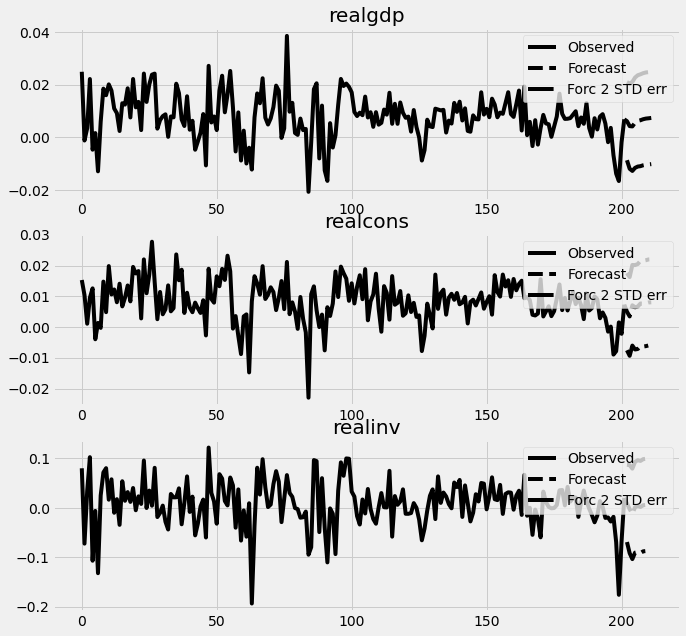

In [55]:
# visualization
fig = model_fitted.plot_forecast(10) # 畫原本的分佈加上預測到的 10 筆數據

## 4. Impulse responses analysis


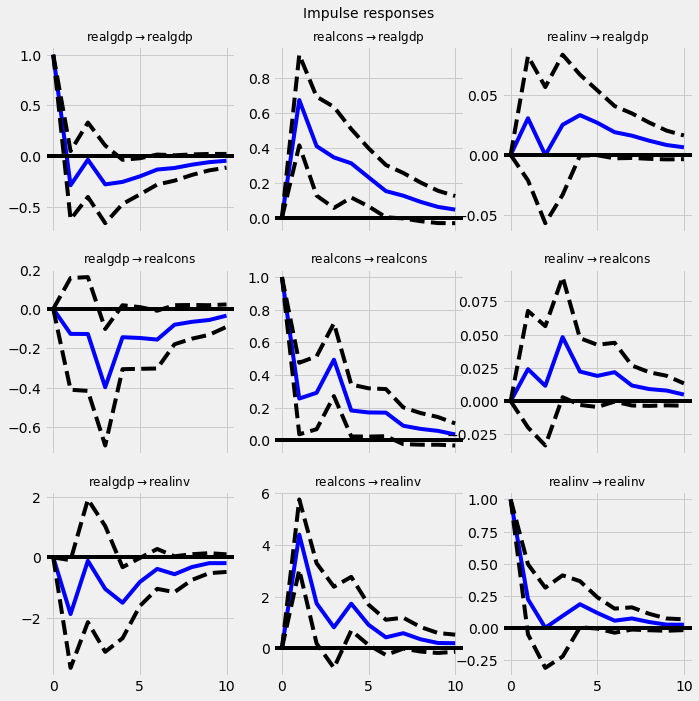

In [57]:
# impulse responses function (irf)
irf = model_fitted.irf(10)
fig = irf.plot(orth=False) # 畫出全部變數之間的 impulse responses

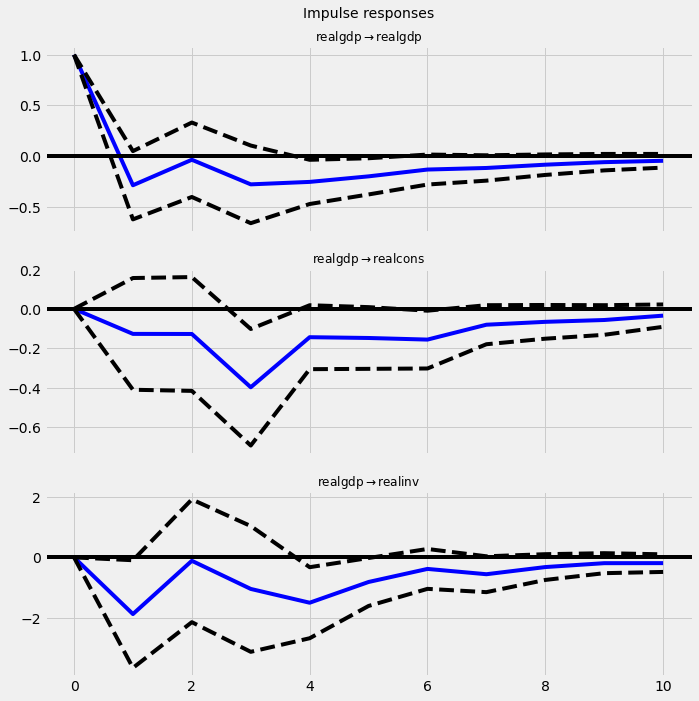

In [59]:
fig = irf.plot(impulse='realgdp') # 只畫出想看的變數的 impulse responses

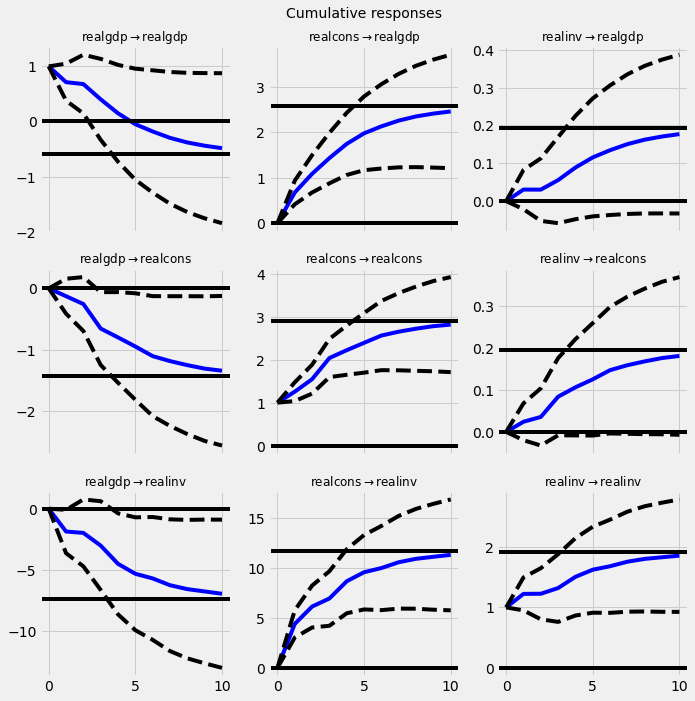

In [60]:
fig = irf.plot_cum_effects(orth=False)

## 5. Forecast Error Variance Decomposition (FEVD)

In [61]:
fevd = model_fitted.fevd(5) # 5 個 steps
fevd.summary()

FEVD for realgdp
      realgdp  realcons   realinv
0    1.000000  0.000000  0.000000
1    0.864889  0.129253  0.005858
2    0.816725  0.177898  0.005378
3    0.793647  0.197590  0.008763
4    0.777279  0.208127  0.014594

FEVD for realcons
      realgdp  realcons   realinv
0    0.359877  0.640123  0.000000
1    0.358767  0.635420  0.005813
2    0.348044  0.645138  0.006817
3    0.319913  0.653609  0.026478
4    0.317407  0.652180  0.030414

FEVD for realinv
      realgdp  realcons   realinv
0    0.577021  0.152783  0.270196
1    0.488158  0.293622  0.218220
2    0.478727  0.314398  0.206874
3    0.477182  0.315564  0.207254
4    0.466741  0.324135  0.209124




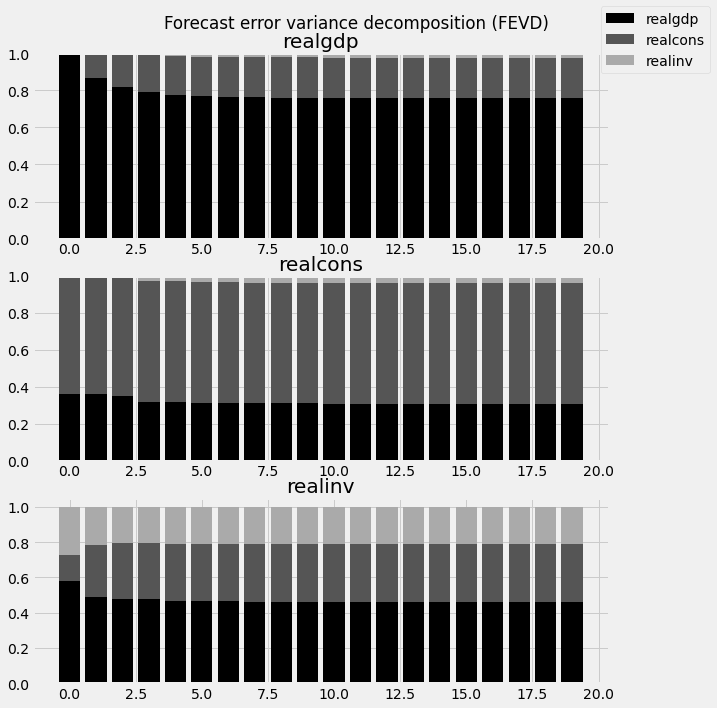

In [62]:
# visualization
fig = model_fitted.fevd(20).plot()

## 6. Statistical tests
* Granger causality: 檢查變數之間的因果關係
* Normality: 白噪音 (誤差項) 在 VAR(p) 中是假設是 $N(0, \Sigma)$ 分佈的，這個就是用來檢查這個假設是否正確

In [64]:
# Granger causality
model_fitted.test_causality('realgdp', ['realinv', 'realcons'], kind='f') # kind 有 Wald (chi^2) test 和 F-test 兩種

In [65]:
# Normality:
model_fitted.test_normality()